In [1]:
from sympy import *
from matplotlib import pyplot
from numpy import linspace
init_printing(fontsize=20)

In [13]:
phi_symb = Symbol('\\phi', real=True)
A   = Symbol('A',     real=True)
x   = Symbol('x',     real=True)
k   = Symbol('k',     real=True)

In [44]:
phi = A*cos(k*x)
Eq(Function('phi')(x), phi)

In [63]:
def plot_sg(A_num, k_num):
    phi_num = phi.subs(A, A_num).subs(k, k_num)

    dV_phi = Abs(phi_symb).diff(phi_symb).subs(phi_symb, phi_num)
    d2dt2_phi = diff(diff(phi, x), x)
    d2dt2_phi_func = d2dt2_phi.subs(k, k_num).subs(A, A_num)
    sqr_wave_ish = dV_phi

    m = sqrt(4/pi/A_num)

    dV_kg = m**2*phi_num

    display(Eq(A*k**2, A_num*k_num**2))
    display(d2dt2_phi_func)
    display(dV_phi)    
    display(dV_kg)

    rhs_free = d2dt2_phi_func
    rhs_sg   = d2dt2_phi_func - sqr_wave_ish
    rhs_kg   = d2dt2_phi_func - dV_kg

    ranges = (x, -0.1, 8.2*pi/k_num)
    p = plot(rhs_sg, rhs_kg, rhs_free, ranges, depth=40)

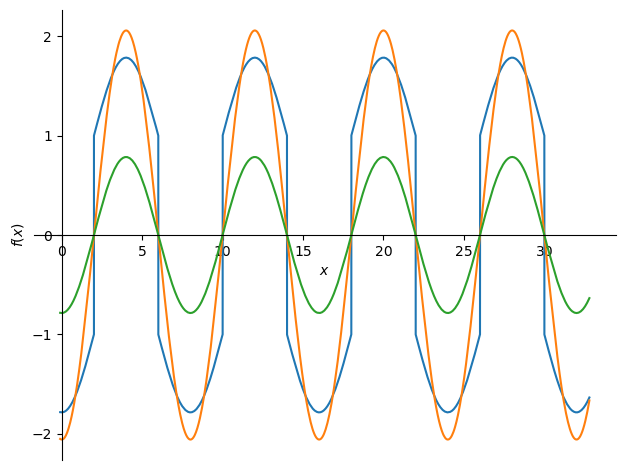

In [70]:
A_num = 4/pi
k_num = pi/4

plot_sg(A_num, k_num)

In [112]:
def plot_sg_4paper(A_num, k_num):
    Ak2 = A_num*k_num**2

    phi_num = phi.subs(A, A_num).subs(k, k_num)
    dV_phi = Abs(phi_symb).diff(phi_symb).subs(phi_symb, phi_num)
    d2dx2_phi = diff(diff(phi, x), x)
    d2dx2_phi_func = d2dx2_phi.subs(k, k_num).subs(A, A_num)
    sqr_wave_ish = dV_phi

    ranges = (x, )

    display(Eq(A, A_num))
    display(Eq(k, k_num))
    display(Eq(A*k**2, Ak2))

    f1 = lambdify(x, -(-sqr_wave_ish+d2dx2_phi_func), 'numpy')
    f2 = lambdify(x, -(-sqr_wave_ish), 'numpy')
    f3 = lambdify(x, -(d2dx2_phi_func), 'numpy')

    offs = 1.25
    x_vals = linspace(float(-offs*pi/k_num), float(offs*pi/k_num), 1000)

    line_width = 1

    pyplot.plot(x_vals, f1(x_vals), color='k', linewidth=line_width, linestyle=':', label='$Ak^2\\cos(kx)+\\text{sign}(\\cos(kx))$')
    pyplot.plot(x_vals, f3(x_vals), color='k', linewidth=line_width, linestyle='-.', label='$Ak^2\\cos(kx)$')
    pyplot.legend(loc='upper right')

    loc = '/home/joao/Dropbox/Fisica/Producao/MassSignum/'
    pyplot.savefig(loc + f"sg_pert_lhs_Ak2_{Ak2:.0e}.png", format='png', dpi=300, bbox_inches='tight')


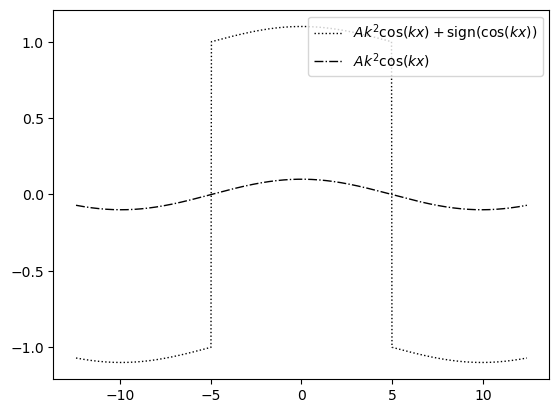

In [113]:
Ak2 = 0.1
A_num = 1
k_num = (Ak2/A_num)**0.5

plot_sg_4paper(A_num, k_num)

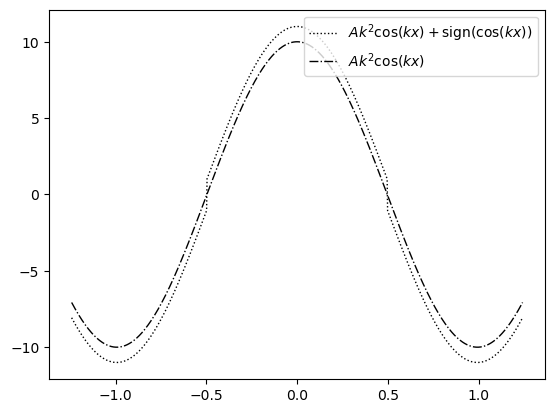

In [109]:
Ak2 = 10
A_num = 1
k_num = (Ak2/A_num)**0.5

plot_sg_4paper(A_num, k_num)

In [17]:
value = 0.1
scientific_notation = f"{value:.0e}"
print(scientific_notation)  # Output: 1.0e-01

1e-01
